# Análisis de Componentes Principales - Paso a Paso

* Estandarizar los datos (para cada una de las m observaciones)
* Obtener los vectores y valores propios a partir de la matriz de covarianzas o de correlaciones o incluso la técnica de singular vector decomposition.
* Ordenar los valores propios en orden descendente y quedarnos con los *p* que se correpondan a los *p* mayores y así disminuir el número de variables del dataset (p<m)
* Constrir la matriz de proyección W a partir de los p vectores propios
* Transformar el dataset original X a través de W para así obtener dadtos en el subespacio dimensional de dimensión *p*, que será Y

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/iris/iris.csv")

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [5]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [6]:
import seaborn as sns

<AxesSubplot:>

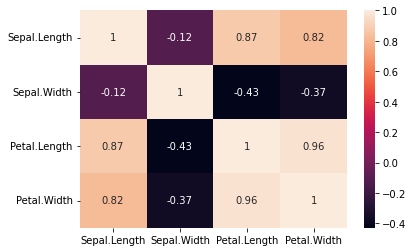

In [71]:
sns.heatmap(df.corr(), annot=True)

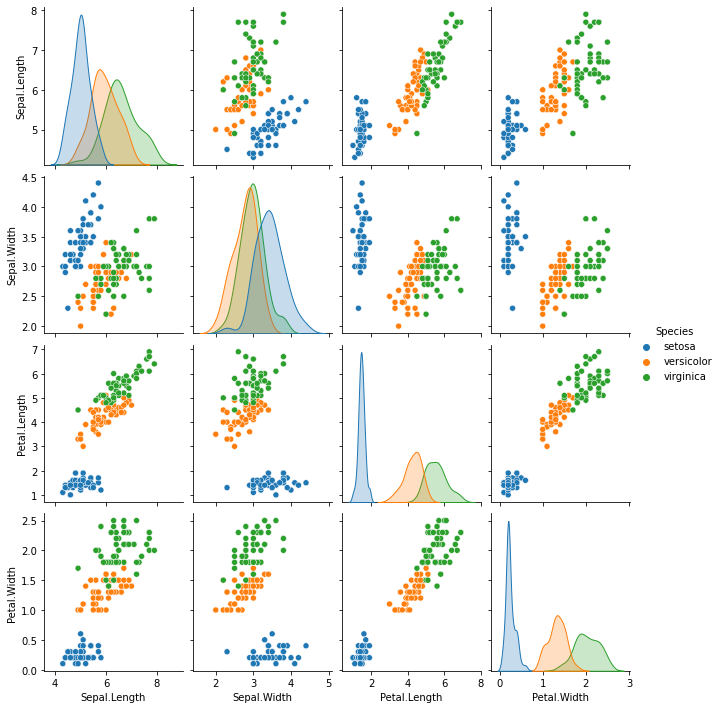

In [20]:
g = sns.pairplot(df, hue="Species")
g.fig.set_size_inches(10, 10)

### 1- Calculamos la descomposición de valores y vectores propios
##### a) Usando la Matriz de Covarianzas

In [21]:
from IPython.display import display, Math, Latex

In [22]:
display(Math(r'\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^m (x_{ij} - \overline{x_j})(x_{ik} - \overline{x_k})'))

<IPython.core.display.Math object>

In [23]:
display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

<IPython.core.display.Math object>

In [24]:
display(Math(r'\overline{x} = \sum_{i=1}^n x_i\in \mathbb R^m'))

<IPython.core.display.Math object>

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X_std = X
mean_vect = np.mean(X_std, axis=0)
mean_vect

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [29]:
cov_matrix = (X_std - mean_vect).T.dot((X_std - mean_vect))/(X_std.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)


La matriz de covarianzas es 
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [30]:
np.cov(X_std.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [31]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[4.22824171 0.24267075 0.0782095  0.02383509]
Vectores propios 
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


##### b) Usando la Matriz de Correlaciones

In [32]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [50]:
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [51]:
corr_matrix = np.corrcoef(X.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

##### c) Singular Value Decomposition

In [35]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.75110816, -0.2841749 ,  0.50215472,  0.32081425],
       [-0.38008617, -0.5467445 , -0.67524332, -0.31725607],
       [-0.51300886,  0.70866455, -0.05916621, -0.48074507],
       [-0.16790754,  0.34367081, -0.53701625,  0.75187165]])

In [36]:
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [37]:
v

array([[-0.06161685, -0.05807094, -0.05676305, ..., -0.0940593 ,
        -0.09488961, -0.08847836],
       [-0.12961144, -0.11101978, -0.11796647, ...,  0.0498297 ,
         0.05610123,  0.0515697 ],
       [ 0.0021386 ,  0.07067239,  0.00434255, ..., -0.04144001,
        -0.21297821, -0.09575285],
       ...,
       [-0.09343429,  0.03690405,  0.03066199, ...,  0.98181631,
        -0.02155617, -0.0086052 ],
       [-0.09573864, -0.03153954,  0.19531473, ..., -0.02194514,
         0.94178018, -0.03021088],
       [-0.08085465,  0.01309526,  0.13569909, ..., -0.00894446,
        -0.02971961,  0.9736599 ]])

### 2 - Las componentes principales

In [55]:
eig_vals, eig_vectors = eig_vals_corr, eig_vectors_corr

In [56]:
for ev in eig_vectors:
    print("La longitud del VP es: %s"%np.linalg.norm(ev))

La longitud del VP es: 0.9999999999999996
La longitud del VP es: 1.0
La longitud del VP es: 0.9999999999999999
La longitud del VP es: 1.0000000000000007


In [57]:
eig_vals

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [58]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.9184978165319957,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9140304714680698,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14675687557131523,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020714836428618964,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Ordenamos los vectores propios con valor propio de mayor a menor

In [59]:
eigen_pairs.sort()
eigen_pairs.reverse()
eigen_pairs

[(2.9184978165319957,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9140304714680698,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14675687557131523,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020714836428618964,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [60]:
print("Valores propios en orden descendente:")
for ep in eigen_pairs:
    print(ep[0])

Valores propios en orden descendente:
2.9184978165319957
0.9140304714680698
0.14675687557131523
0.020714836428618964


In [61]:
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [62]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[72.96244541329989, 22.850761786701746, 3.6689218892828808, 0.5178709107154741]

In [63]:
print('El porcentaje de información acumulado en orden es:')
cum_var_exp

El porcentaje de información acumulado en orden es:


array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

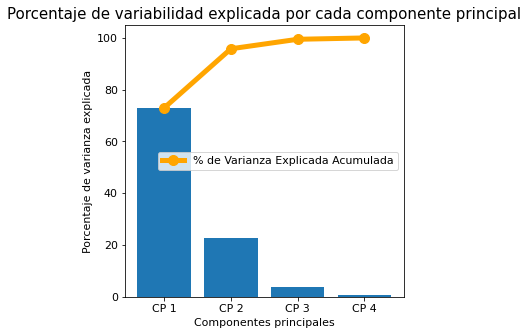

In [64]:
plt.figure(figsize=(5, 5))

x=["CP %s"%i for i in range(1,5)]

plt.bar(x, var_exp)
plt.plot(x, cum_var_exp, '.-', label="% de Varianza Explicada Acumulada", c='orange', linewidth=5, markersize=20)

plt.xlabel("Componentes principales", fontsize=11)
plt.ylabel("Porcentaje de varianza explicada", fontsize=11)
plt.title("Porcentaje de variabilidad explicada por cada componente principal", fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(loc='best', fontsize=11)

In [65]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), 
               eigen_pairs[1][1].reshape(4,1)))
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [66]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

### 3- Proyectando las variables en el nuevo subespacio vectorial

In [67]:
display(Math(r'Y = X \cdot W, X \in M(\mathbb R)_{150, 4}, W \in M(\mathbb R)_{4,2}, Y \in M(\mathbb R)_{150, 2}'))

<IPython.core.display.Math object>

In [68]:
Y = X_std.dot(W)
Y

array([[ 2.64026976, -5.2040413 ],
       [ 2.6707303 , -4.66690995],
       [ 2.45460631, -4.77363639],
       [ 2.54551709, -4.64846339],
       [ 2.56122842, -5.2586291 ],
       [ 2.97594579, -5.70732073],
       [ 2.4631572 , -4.92969712],
       [ 2.67313922, -5.07641913],
       [ 2.43713208, -4.38587157],
       [ 2.64535121, -4.75499447],
       [ 2.80076135, -5.50437488],
       [ 2.62696735, -5.00338477],
       [ 2.56213805, -4.62247398],
       [ 2.12748116, -4.42641769],
       [ 2.75425956, -5.92498314],
       [ 2.88150922, -6.27729552],
       [ 2.74378055, -5.69752408],
       [ 2.69675541, -5.2107355 ],
       [ 3.10271466, -5.72152225],
       [ 2.67399249, -5.49017336],
       [ 2.9976482 , -5.2322845 ],
       [ 2.75741289, -5.40453799],
       [ 2.12063682, -5.09786541],
       [ 3.03772014, -5.04681224],
       [ 2.80109128, -5.01073225],
       [ 2.83891951, -4.70955003],
       [ 2.84415184, -5.09225669],
       [ 2.75041766, -5.24423222],
       [ 2.71931109,

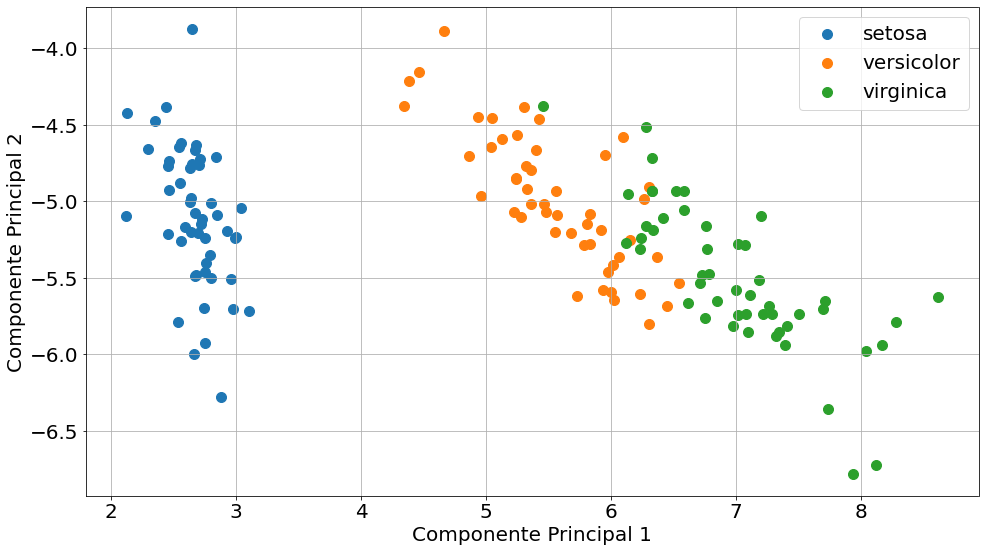

In [69]:
plt.figure(figsize=(16, 9))

for name in ('setosa', 'versicolor', 'virginica'):
    plt.scatter(Y[y==name,0], Y[y==name,1], s=100, label=name)

plt.xlabel("Componente Principal 1", fontsize=20)
plt.ylabel("Componente Principal 2", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

plt.legend(fontsize=20)